In [1]:
import mod1
import importlib
importlib.reload(mod1)

import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import t

In [2]:
list_name_tickers = [
        'MSFT',
        'AAPL',
        'FB',
        'AMZN'
#        'NDAQ',
#        'SPY'
    ]
nb_days = 252
period = '252d'
df_stocks_prices = mod1.create_df_prices(list_name_tickers, period=period, cat='Open')
returns = df_stocks_prices.pct_change()[1:]
mean_returns = np.array(returns.mean())
cov_returns = np.array(returns.cov())
rf_rate = 0.0178
bound = (0.0,1.0)

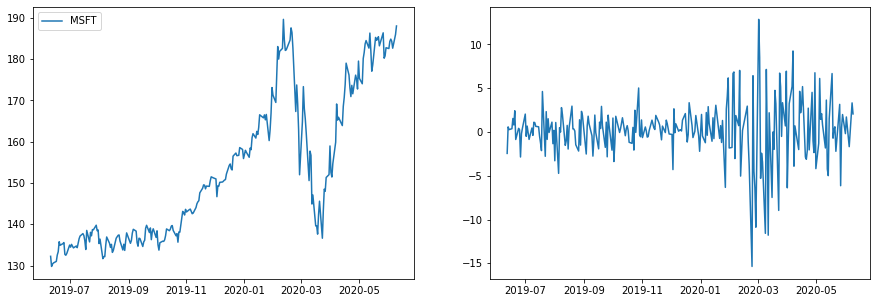

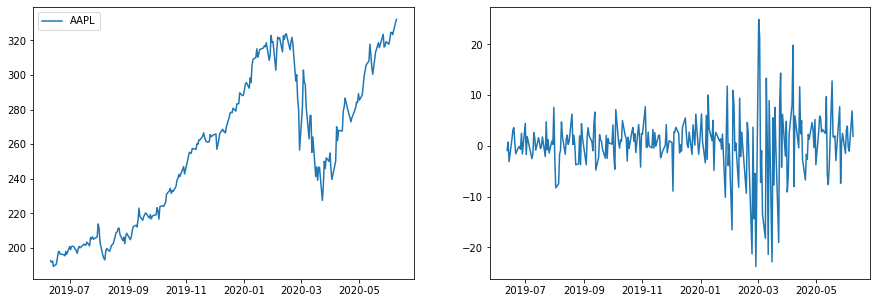

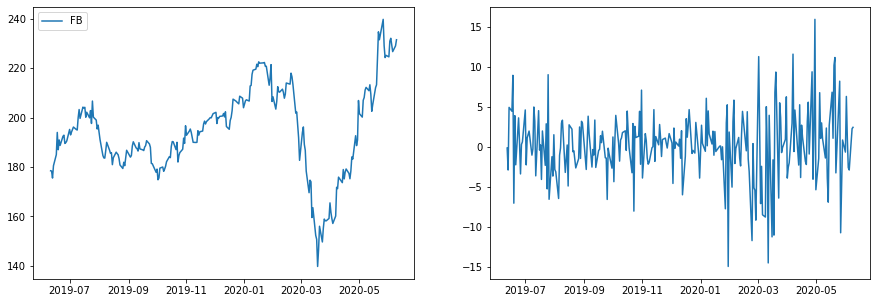

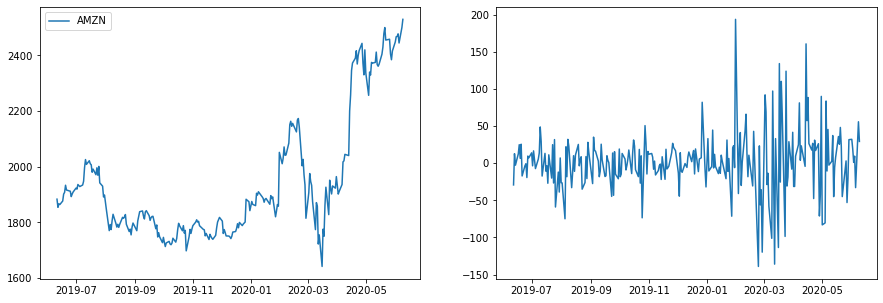

In [3]:
mod1.plot_stock_prices(df_stocks_prices)

In [4]:
weights_max_sharpe = mod1.max_sharpe_ratio(mean_returns, cov_returns, rf_rate, nb_days, bound=bound)['x']
pf_max_sharpe_return = mod1.pf_period_return(weights_max_sharpe, mean_returns)
pf_max_sharpe_std = mod1.pf_period_std(weights_max_sharpe, cov_returns)

In [5]:
weights_min_vol = mod1.min_volatility(cov_returns, nb_days, bound=bound)['x']
pf_min_vol_return = mod1.pf_period_return(weights_min_vol, mean_returns)
pf_min_vol_std = mod1.pf_period_std(weights_min_vol, cov_returns)

In [6]:
returns_range = np.linspace(pf_min_vol_return - 0.05, pf_max_sharpe_return + 0.05, 200)
results_opt_efficient_frontier = mod1.efficient_frontier(mean_returns, cov_returns, returns_range, nb_days=nb_days, bound=bound)
results_opt_efficient_frontier = [res for res in results_opt_efficient_frontier 
                                  if res.message == 'Optimization terminated successfully.']

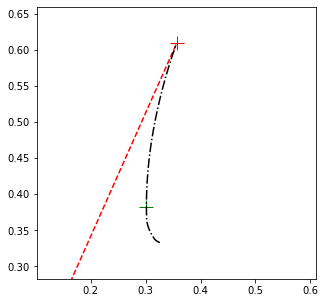

In [7]:
plt.figure(10, figsize=(5,5))
plt.plot(pf_max_sharpe_std, pf_max_sharpe_return,'r+', markersize=14)
plt.plot([0, pf_max_sharpe_std], [0, pf_max_sharpe_return], '--r')
plt.plot(pf_min_vol_std, pf_min_vol_return,'g+', markersize=14)
plt.plot([p['fun'] for p in results_opt_efficient_frontier], returns_range[:len(results_opt_efficient_frontier)],
         '-.', color='black', label='efficient frontier')
plt.xlim([pf_min_vol_std - 0.2, pf_max_sharpe_return])
plt.ylim([pf_min_vol_return - 0.1, pf_max_sharpe_return + 0.05])
plt.show()